In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path =r'C:\Users\aramaiah.ASUAD\Naresh_IT\MyDataScience\Data_Files\Visadataset.csv'
visa_df=pd.read_csv(path)
visa_df.head(3)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied


In [24]:
# import packages and read the data always 




#############Step-1#############

Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)
############Step 2##############
IQR=Q3-Q1

###########Step 3################

lb=Q1-1.5*IQR
ub=Q2+1.5*IQR

##########Step 4###############

c1=visa_df['prevailing_wage']<lb
c2=visa_df['prevailing_wage']>ub
con=c1|c2

############Step 5################
outliers_df=visa_df[con]
outliers_df

##########Step-6#################
non_outliers_df =visa_df[c1&c2]
non_outliers_df
emp=[]
median=visa_df['prevailing_wage'].median()
for i in visa_df['prevailing_wage']:
    if i<lb or i>ub:
        emp.append(median)
    else:
        emp.append(i)

visa_df['prevailing_wage_new']=emp



In [11]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_new
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,592.2029
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,83425.6500
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,122996.8600
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,83434.0300
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,149907.3900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,77092.5700
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,70308.2100
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,146298.8500
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,86154.7700


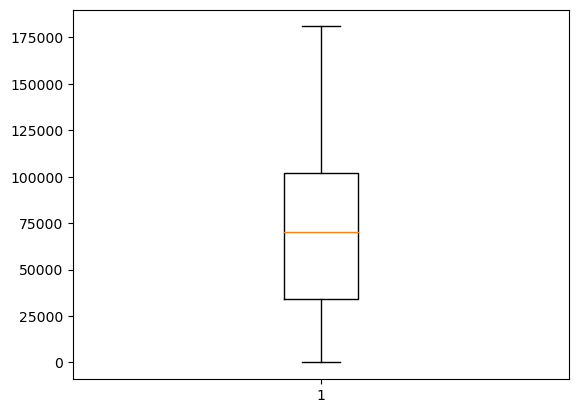

In [26]:
plt.boxplot(visa_df['prevailing_wage_new'])
plt.show()

## np.where ##

In [14]:
# Read the Data again 
path =r'C:\Users\aramaiah.ASUAD\Naresh_IT\MyDataScience\Data_Files\Visadataset.csv'
visa_df=pd.read_csv(path)
visa_df.head(3)


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied


- above replace one we use a traditional approach 
- for loop, list, if-else
- the same we can get by using np.where method


In [28]:
dict1={'Name':['A','B','C','D'],'Num':[1,2,3,4]}
d=pd.DataFrame(dict1)
d

,Name,Num
0,A,1
1,B,2
2,C,3
3,D,4


In [18]:
#  i want to replace num has > 2
#  otherwise keep same number 
l=[]
for i in d['Num']:
    if i>2:
        l.append(100)
    else:
        l.append(i)
d['Num']=l
d

,Name,Num
0,A,1
1,B,2
2,C,100
3,D,100


In [ ]:
# How many condition i>2 if it is true ==== one value 
#                          if it is false ===== another value

np.where(con,True,False)
- will take 3 arguments 
    - condition
    - con=d['Num']>2
    
- True value
    - t=100
- False value


    - f=d['Num']

In [29]:
l=np.where(d['Num']>2,100,d['Num'])

d['Num']=l
d

,Name,Num
0,A,1
1,B,2
2,C,100
3,D,100


In [34]:
con=d['Num']>2

l=np.where(con,100,d['Num'])
d['Num']=l
d

# this wont work hence we have to put the consition directly inro the where condition

,Name,Num
0,A,100
1,B,100
2,C,100
3,D,100


In [ ]:
# import packages and read the data always 




#############Step-1#############

Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)
############Step 2##############
IQR=Q3-Q1

###########Step 3################

lb=Q1-1.5*IQR
up=Q2+1.5*IQR

##########Step 4###############

c1=visa_df['prevailing_wage']<lb
c2=visa_df['prevailing_wage']>up
con=c1|c2

############Step 5################
outliers_df=visa_df[con]
outliers_df

##########Step-6#################
non_outliers_df =visa_df[c1&c2]
non_outliers_df
# emp=[]
# median=visa_df['prevailing_wage'].median()
# for i in visa_df['prevailing_wage']:
#     if i<lb or i>up:
#         emp.append(median)
#     else:
#         emp.append(i)

# visa_df['prevailing_wage_new']=emp



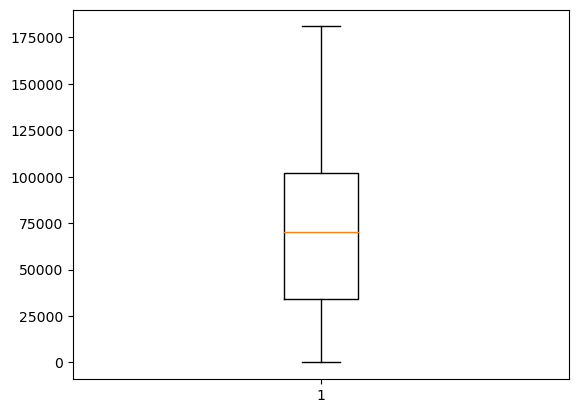

In [38]:

#############Step-1#############

Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)
############Step 2##############
IQR=Q3-Q1
############Step 3##############
lb=Q1-1.5*IQR
up=Q3+1.5*IQR

median=visa_df['prevailing_wage'].median()

# con1=visa_df['prevailing_wage']<lb or visa_df['prevailing_wage']>ub

true_value = median

false_value = visa_df['prevailing_wage']

# m=np.where(<con>,<true_value>,<false_value>)

c1=visa_df['prevailing_wage']<lb

c2=visa_df['prevailing_wage']>ub

con=c1|c2

visa_df['prevailing_wage']=np.where(con,true_value,false_value)
plt.boxplot(visa_df['prevailing_wage'])
plt.show()


